## Лабораторная работа №2. Токенизация
#### Предмет: Методы интеллектуального анализа текстов
#### Студент: Леонова Алина, СБ № 1032212306, НФИмд-01-21

# 2. Токенизация

Данные одни для всех заданий:

In [1]:
! wget -q https://www.dropbox.com/s/ug0b4pvuynwj4pe/news_science.zip && unzip news_science.zip

Archive:  news_science.zip
replace news_science/news1_txt/news1_1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import glob
import pandas as pd
from tqdm import tqdm


data = []
for path in glob.glob('./news_science/*'):
  texts = []
  for filename in tqdm(glob.glob(path + '/*.txt')):
    texts.append(open(filename, 'r').read().strip())
  
  data.append(pd.DataFrame({'text': texts}))
  data[-1]['genre'] = path.split('/')[-1][:3]  # 'new' или 'sci'

data = pd.concat(data)

100%|██████████| 79/79 [00:00<00:00, 7992.81it/s]


In [3]:
data.sample(3)

,text,genre
9,УДК 004.89 \nВЕРИФИКАЦИЯ ДАННЫХ В СИСТЕМАХ ОТ...,sci
50,ИЕРУСАЛИМ – Как обнаружил посол по специальным...,new
42,В Сан-Франциско прошло технологическое шоу Tec...,new


### 2.1 Изобразить облака слов для научных и новостных текстов (wordcloud, без стоп-слов) 

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

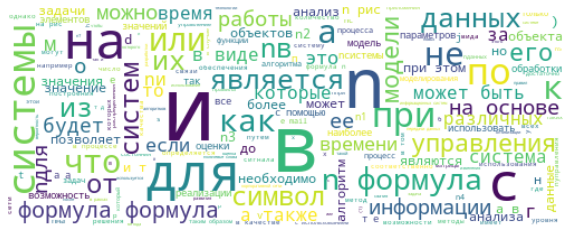

In [5]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# выделение научных и новостных текстов 
sci = data[data.genre == 'sci'].to_string().lower()
new = data[data.genre == 'new'].to_string().lower()


def print_cloud(texts):
    wordcloud = WordCloud(width = 500, height = 200, 
                          random_state = 40, max_font_size = 80,
                          background_color="white", regexp=r"[\w\d\(\)]+").generate(texts)
    plt.figure(figsize =(10,7))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

print_cloud(sci)

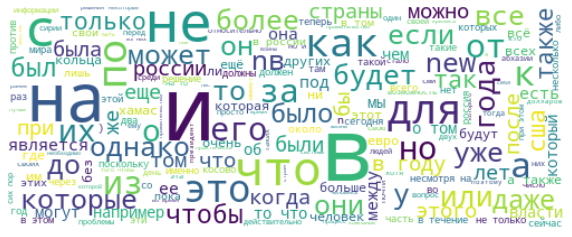

In [6]:
print_cloud(new)

### 2.2 Найти частотные n-граммы новостных и научных статей

Извлекаем и чистим токены

In [7]:
import string, re

# Инициализировать токенизатор
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\W+', gaps=True)

# 1. Токенизировать тексты выбранным токенизатором, приведя их к нижнему регистру
data['text_tokenized'] = data.text.map(lambda row: tokenizer.tokenize(row.lower()))

# 2. Удалить из списка токенов те, которые представлены пунктуацией и числами
def is_symbol(tok):
    """ Функция определения, состоит ли токен только из знаков пунктуации """
    result = True;
    for s in tok:
        if not s in string.punctuation:
            result = False
    return result
    
def clean_tokens(tokens):
    """ Функция возвращает из списка токенов только слова на русском языке """
    tokens = [token for token in tokens if not is_symbol(token) and not token.isnumeric() and not token.isascii()]
    return tokens
    
def clean_tokens2(tokens):
    """ Функция возвращает из списка токенов только слова на русском языке, второй вариант"""
    tokens = [token for token in tokens if re.match(r'[а-яА-Я]', token)]
    return tokens

data['text_tokenized'] = data.text_tokenized.map(clean_tokens)
data['text_tokenized_2'] = data.text_tokenized.map(clean_tokens2)

data

,text,genre,text_tokenized,text_tokenized_2
0,"﻿УДК 004.4: 004.94, 001.89 \nГ. П. Пуха, П. В...",sci,"[удк, г, п, пуха, п, в, попов, р, в, драчев, н...","[удк, г, п, пуха, п, в, попов, р, в, драчев, н..."
1,﻿АВТОМАТИЗИРОВАННАЯ СИСТЕМА ВЫЯВЛЕНИЯ ЭЛЕКТРОМ...,sci,"[автоматизированная, система, выявления, элект...","[автоматизированная, система, выявления, элект..."
2,Вестник Санкт-Петербургского университета. 200...,sci,"[вестник, санкт, петербургского, университета,...","[вестник, санкт, петербургского, университета,..."
3,УДК 004.627 \nDOI: 10.17586/0021-3454-2015-58...,sci,"[удк, метод, сжатия, видеопоследовательностей,...","[удк, метод, сжатия, видеопоследовательностей,..."
4,СИНТЕЗ ИНФОРМАЦИОННО-ЭНЕРГЕТИЧЕСКИХ СВЯЗЕЙ В С...,sci,"[синтез, информационно, энергетических, связей...","[синтез, информационно, энергетических, связей..."
...,...,...,...,...
74,"На улице Грушевского в Киеве, где в воскресень...",new,"[на, улице, грушевского, в, киеве, где, в, вос...","[на, улице, грушевского, в, киеве, где, в, вос..."
75,"Установлена личность молодого человека, захват...",new,"[установлена, личность, молодого, человека, за...","[установлена, личность, молодого, человека, за..."
76,Кремль опять провоцирует Запад в связи с долги...,new,"[кремль, опять, провоцирует, запад, в, связи, ...","[кремль, опять, провоцирует, запад, в, связи, ..."
77,Фернандо Алонсо в первый раз в своей карьере п...,new,"[фернандо, алонсо, в, первый, раз, в, своей, к...","[фернандо, алонсо, в, первый, раз, в, своей, к..."


Создаем списки биграмм для текстов разных жанров

In [8]:
import nltk


def create_bigram(tokens):
    bigrams = nltk.bigrams(tokens)
    return list(bigrams)

# для новостных текстов
tokens_news = [token for row in data[data.genre == 'new'].text_tokenized.values for token in row]
bigrams_list = create_bigram(tokens_news)
bigrams_news = [" ".join(bigram) for bigram in list(bigrams_list)]
# для научных текстов
tokens_sci = [token for row in data[data.genre == 'sci'].text_tokenized.values for token in row]
bigrams_list = create_bigram(tokens_sci)
bigrams_sci = [" ".join(bigram) for bigram in list(bigrams_list)]

# Тестирование
assert bigrams_news[:3] == ['депутат законодательного', 'законодательного собрания', 'собрания санкт'], 'проверьте функции фильтрации списка токенов'
assert bigrams_sci[:3] == ['удк г', 'г п', 'п пуха'], 'проверьте функции фильтрации списка токенов'
print("Тест пройден")

Тест пройден


Создаем счетчик частотностей биграмм

In [9]:
from collections import Counter
from collections import OrderedDict


def sort_by_frequency(list_of_ngrams, reverse=True):
    """ 
    Функция сортировки n-грамм по частотности вхождения в список
    Возвращает упорядоченный словарь (OrderedDict) 
    """
    data_with_freq = Counter()
    data_with_freq.update(list_of_ngrams)
    data_sorted_by_freq = OrderedDict()
    for d,f in data_with_freq.most_common(20):
        data_sorted_by_freq[d] = f
    
    return data_sorted_by_freq


bigrams_news_sorted = sort_by_frequency(bigrams_news)
bigrams_sci_sorted = sort_by_frequency(bigrams_sci)

# Тестирование
assert type(bigrams_news_sorted) == OrderedDict, 'Словарь должен быть упорядоченным'
assert bigrams_news_sorted.get('в течение') == 30, 'Проверьте счетчик биграмм'
print('Тесты пройдены')

print('\nТоп-20 частотных N-грамм новостных статей')
for i in bigrams_news_sorted:
    print (i, ' - ', bigrams_news_sorted[i])

print('\nТоп-20 частотных N-грамм научных статей')
for i in bigrams_sci_sorted:
    print (i, ' - ', bigrams_sci_sorted[i])

Тесты пройдены

Топ-20 частотных N-грамм новостных статей
в году  -  65
том что  -  59
то что  -  47
о том  -  45
а также  -  43
в россии  -  37
несмотря на  -  35
и в  -  35
в том  -  34
в течение  -  30
и не  -  30
не только  -  28
что в  -  27
в этом  -  26
при этом  -  25
таким образом  -  24
в то  -  23
на то  -  23
но и  -  22
во время  -  22

Топ-20 частотных N-грамм научных статей
формула формула  -  133
на основе  -  99
может быть  -  73
а также  -  70
в виде  -  66
при этом  -  61
в качестве  -  59
таким образом  -  58
формула где  -  57
и т  -  54
т е  -  52
а в  -  52
на рис  -  52
с помощью  -  49
в в  -  47
в процессе  -  43
в случае  -  41
а а  -  41
в том  -  39
и в  -  39


В результате, наиболее частые N-граммы для новостных статей содержат начала описаний событий (когда, где, что, о чем). А наиболее частые для научных статей - связки слов между логическими частями, использующиеся в доказательствах и при подробном пояснении. 

### 2.4	Сравнить качество жанровой классификации на TF-IDF-векторах с использованием двух различных токенизаторов (на словах и на частях слов)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer 
tokenizer = RegexpTokenizer('\W+', gaps=True)
stemmer = SnowballStemmer("russian") 
vectorizer = TfidfVectorizer()

def tfid(tokens):
    vectorizer.fit_transform(tokens)
    return vectorizer.get_feature_names()

data['text_tokenized'] = data.text.map(lambda x: tokenizer.tokenize(x))
data['text_lemmatized'] = data.text_tokenized.map(lambda tokens: [stemmer.stem(token) for token in tokens])

data

,text,genre,text_tokenized,text_tokenized_2,text_lemmatized
0,"﻿УДК 004.4: 004.94, 001.89 \nГ. П. Пуха, П. В...",sci,"[УДК, 004, 4, 004, 94, 001, 89, Г, П, Пуха, П,...","[удк, г, п, пуха, п, в, попов, р, в, драчев, н...","[удк, 004, 4, 004, 94, 001, 89, г, п, пух, п, ..."
1,﻿АВТОМАТИЗИРОВАННАЯ СИСТЕМА ВЫЯВЛЕНИЯ ЭЛЕКТРОМ...,sci,"[АВТОМАТИЗИРОВАННАЯ, СИСТЕМА, ВЫЯВЛЕНИЯ, ЭЛЕКТ...","[автоматизированная, система, выявления, элект...","[автоматизирова, систем, выявлен, электромагни..."
2,Вестник Санкт-Петербургского университета. 200...,sci,"[Вестник, Санкт, Петербургского, университета,...","[вестник, санкт, петербургского, университета,...","[вестник, санкт, петербургск, университет, 200..."
3,УДК 004.627 \nDOI: 10.17586/0021-3454-2015-58...,sci,"[УДК, 004, 627, DOI, 10, 17586, 0021, 3454, 20...","[удк, метод, сжатия, видеопоследовательностей,...","[удк, 004, 627, DOI, 10, 17586, 0021, 3454, 20..."
4,СИНТЕЗ ИНФОРМАЦИОННО-ЭНЕРГЕТИЧЕСКИХ СВЯЗЕЙ В С...,sci,"[СИНТЕЗ, ИНФОРМАЦИОННО, ЭНЕРГЕТИЧЕСКИХ, СВЯЗЕЙ...","[синтез, информационно, энергетических, связей...","[синтез, информацион, энергетическ, связ, в, с..."
...,...,...,...,...,...
74,"На улице Грушевского в Киеве, где в воскресень...",new,"[На, улице, Грушевского, в, Киеве, где, в, вос...","[на, улице, грушевского, в, киеве, где, в, вос...","[на, улиц, грушевск, в, киев, где, в, воскресе..."
75,"Установлена личность молодого человека, захват...",new,"[Установлена, личность, молодого, человека, за...","[установлена, личность, молодого, человека, за...","[установл, личност, молод, человек, захват, за..."
76,Кремль опять провоцирует Запад в связи с долги...,new,"[Кремль, опять, провоцирует, Запад, в, связи, ...","[кремль, опять, провоцирует, запад, в, связи, ...","[кремл, опя, провоцир, запад, в, связ, с, долг..."
77,Фернандо Алонсо в первый раз в своей карьере п...,new,"[Фернандо, Алонсо, в, первый, раз, в, своей, к...","[фернандо, алонсо, в, первый, раз, в, своей, к...","[фернанд, алонс, в, перв, раз, в, сво, карьер,..."


In [11]:
from sklearn.model_selection import train_test_split
sci = data[data.genre == 'sci']
new = data[data.genre == 'new']

# разделение на обучающие и тестовые выборки
train_sci, test_sci = train_test_split(sci, test_size=0.20, random_state=42)
train_new, test_new = train_test_split(new, test_size=0.20, random_state=42)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, tokenizer=lambda x: x.split(' '), ngram_range=(1,3), max_features=20000)
cv.fit(train_sci['tfid_lemmatized'])
X1_train = cv.transform(train_sci['tfid_lemmatized'])
X1_test = cv.transform(test_sci['tfid_lemmatized'])

KeyError: ignored